# Análise dos países no ranking do PISA



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
FILE = '/content/Indice educacao.xlsx'
df = pd.read_excel(FILE)

In [12]:
display(df.head(20))
display(df.dtypes)

,Posição,País / Economia,Pontuação PISA (2022),IDH (últimos dados),PIB (em bilhões de USD),Continente
0,1,Singapura,575,0.939,547.39,Ásia
1,2,Macau (China),552,0.914,25.40,Ásia
2,3,Taiwan,547,N/A*,759.00,Ásia
3,4,Hong Kong (China),540,0.952,407.11,Ásia
4,5,Japão,536,0.925,4026.21,Ásia
5,6,Coreia do Sul,527,0.925,1712.79,Ásia
6,7,Estônia,510,0.892,42.91,Europa
7,8,Suíça,508,0.97,936.56,Europa
8,9,Canadá,497,0.929,2241.25,América do Norte
9,10,Países Baixos,493,0.944,1088.27,Europa


,0
Posição,int64
País / Economia,object
Pontuação PISA (2022),int64
IDH (últimos dados),object
PIB (em bilhões de USD),float64
Continente,object


In [14]:
df['IDH (últimos dados)'] = pd.to_numeric(df['IDH (últimos dados)'], errors='coerce')

In [17]:
col_nome = {'Posição': 'id', 'País / Economia': 'pais', 'Pontuação PISA (2022)': 'pisa', 'IDH (últimos dados)': 'idh', 'PIB (em bilhões de USD)': 'pib', 'Continente': 'continente'}
df.rename(columns=col_nome, inplace=True)

Correlação entre os indicadores

In [18]:
indicadores = df.drop(['id','pais','continente'], axis=1)

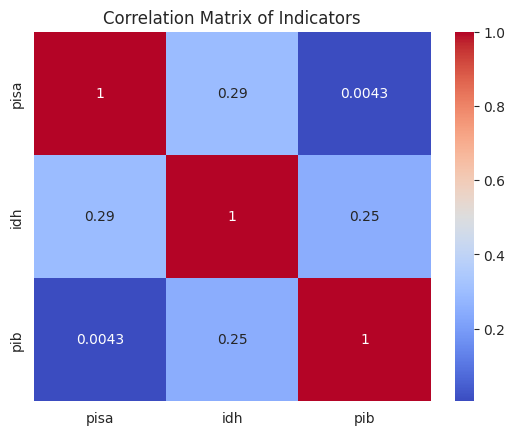

In [21]:
sns.set_style('dark')
correlation_matrix = indicadores.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Indicators')
plt.show()

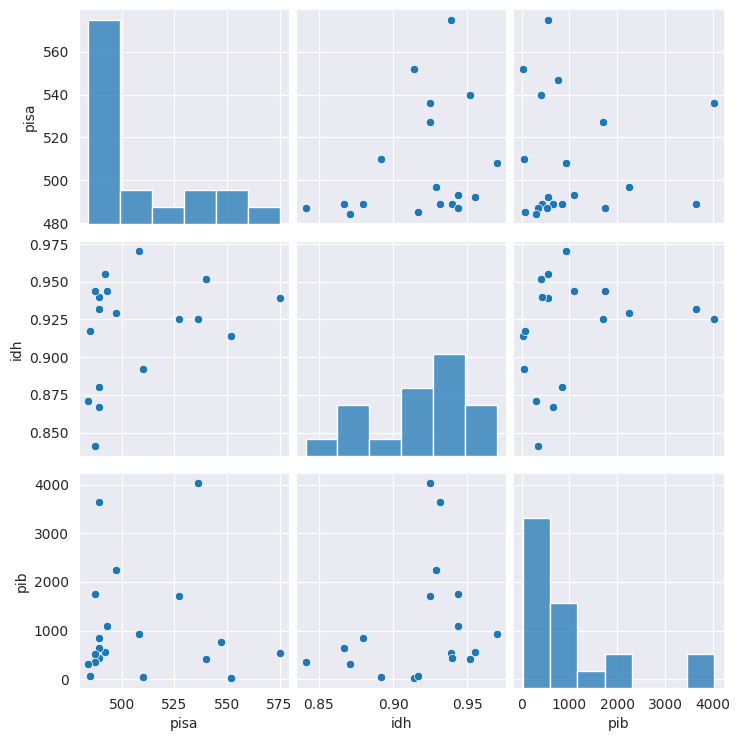

In [34]:
sns.pairplot(indicadores);

- Somando o PIB dos continentes

In [22]:
pib_continente = df.groupby('continente')['pib'].sum()

,pib
continente,
América do Norte,2241.25
Europa,9458.89
Oceania,1752.19
Ásia,7477.90


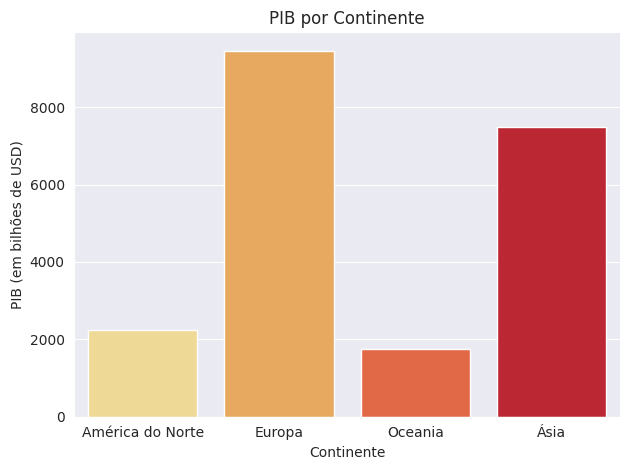

In [31]:
display(pib_continente)

sns.set_style('darkgrid')
sns.barplot(x=pib_continente.index, y=pib_continente.values, palette='YlOrRd', hue=pib_continente.index, legend=False)
plt.title('PIB por Continente')
plt.xlabel('Continente')
plt.ylabel('PIB (em bilhões de USD)')
plt.tight_layout()
plt.show()

- Soma do PISA

In [35]:
pisa_continente = df.groupby('continente')['pisa'].sum()

,pib
continente,
América do Norte,2241.25
Europa,9458.89
Oceania,1752.19
Ásia,7477.90


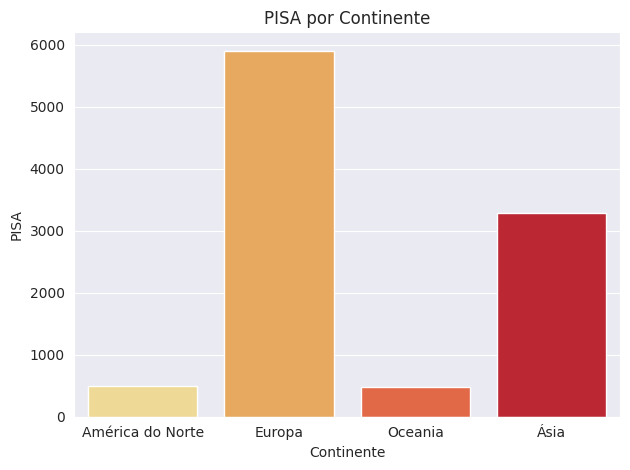

In [38]:
display(pib_continente)

sns.set_style('darkgrid')
sns.barplot(x=pisa_continente.index, y=pisa_continente.values, palette='YlOrRd', hue=pisa_continente.index, legend=False)
plt.title('PISA por Continente')
plt.xlabel('Continente')
plt.ylabel('PISA')
plt.tight_layout()
plt.show()

- Ranking dos países

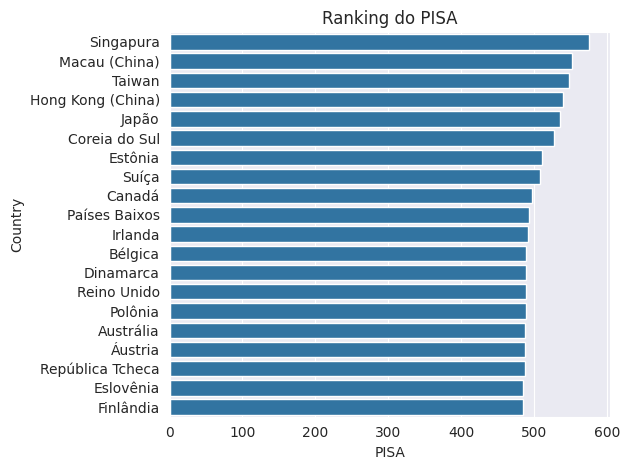

In [40]:
sns.set_style('darkgrid')
sns.barplot(data=df, x='pisa', y='pais', orient='h')
plt.title('Ranking do PISA')
plt.xlabel('PISA')
plt.ylabel('Country')
plt.tight_layout()
plt.show()